# Análise Exploratória dos Dados de Prefeitos (2k-200k habitantes)

Este notebook apresenta uma análise exploratória do arquivo `dados_unificados_prefeitos_200k.csv`, que consolida as informações de resultados eleitorais, valores de emendas PIX e indicadores socioeconômicos dos municípios.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
pd.options.display.float_format = '{:.2f}'.format

path = '../data/dados_unificados_prefeitos_200k.csv'
df = pd.read_csv(path)
df.head()

,municipio,sigla_municipio,prefeito_eleito_2024,sigla_partido_prefeito_eleito,porcentagem_votos_validos_2024,emendas_pix_per_capita_partido_prefeito_eleito,idhm_2010,alfabetizacao_2010,pib_per_capita_2021,densidade_demografica_2010
0,ABADIA DE GOIAS - GO,GO,WANDER SARAIVA,PP,1.000000,18716.018402,0.708,92.19,18491.217064,133.397997
1,ABADIA DOS DOURADOS - MG,MG,CIRO,PSD,0.575992,3188.775510,0.689,90.88,28184.630102,7.127400
2,ABADIANIA - GO,GO,DR ITAMAR,PP,0.619504,3481.894150,0.689,89.16,25842.850511,16.509351
3,ABAETE - MG,MG,IVANIR,MDB,0.491826,1764.057332,0.698,91.28,23869.415656,12.479830
4,ABAETETUBA - PA,PA,FRANCINETI CARVALHO,MDB,0.417201,2528.605204,0.628,86.29,12322.938529,98.228786


## Visão Geral

A primeira etapa consiste em verificar o formato da base e o tipo das variáveis.

In [2]:
df.shape, df.dtypes

((5208, 10),
 municipio                                          object
 sigla_municipio                                    object
 prefeito_eleito_2024                               object
 sigla_partido_prefeito_eleito                      object
 porcentagem_votos_validos_2024                    float64
 emendas_pix_per_capita_partido_prefeito_eleito    float64
 idhm_2010                                         float64
 alfabetizacao_2010                                float64
 pib_per_capita_2021                               float64
 densidade_demografica_2010                        float64
 dtype: object)

In [6]:
df.isna().sum()

# Count 0 values in 'emendas_pix_per_capita_partido_prefeito_eleito'
df.emendas_pix_per_capita_partido_prefeito_eleito.value_counts()

emendas_pix_per_capita_partido_prefeito_eleito
0.000000        2510
6899.724011        2
3335.974313        2
23584.905660       2
22602.518566       2
                ... 
3188.775510        1
4148.230088        1
3422.430610        1
7365.319865        1
61208.130369       1
Name: count, Length: 2686, dtype: int64

In [7]:
df.describe().round(2)

,porcentagem_votos_validos_2024,emendas_pix_per_capita_partido_prefeito_eleito,idhm_2010,alfabetizacao_2010,pib_per_capita_2021,densidade_demografica_2010
count,5208.000000,5208.000000,5186.000000,5186.000000,5208.000000,5208.000000
mean,0.615455,7349.928206,0.655347,83.423438,33680.935253,68.109180
std,0.147832,16346.433118,0.070895,9.840582,39217.920222,300.171789
min,0.231060,0.000000,0.418000,55.600000,5698.887104,0.153795
25%,0.519710,0.000000,0.596000,75.200000,13237.406928,11.096280
50%,0.581624,500.715049,0.661000,86.390000,23386.454033,23.631862
75%,0.685910,7828.632452,0.713000,91.587500,40514.771107,49.818862
max,1.000000,386773.027202,0.862000,99.050000,919488.032158,10718.673987


### Filtragem de casos sem emendas ou com votação unânime
As análises a seguir desconsideram municípios que receberam soma zero de Emendas PIX ou onde apenas um candidato concorreu (100% dos votos válidos).

## Distribuições

As distribuições das variáveis numéricas ajudam a identificar possíveis assimetrias e a presença de outliers.

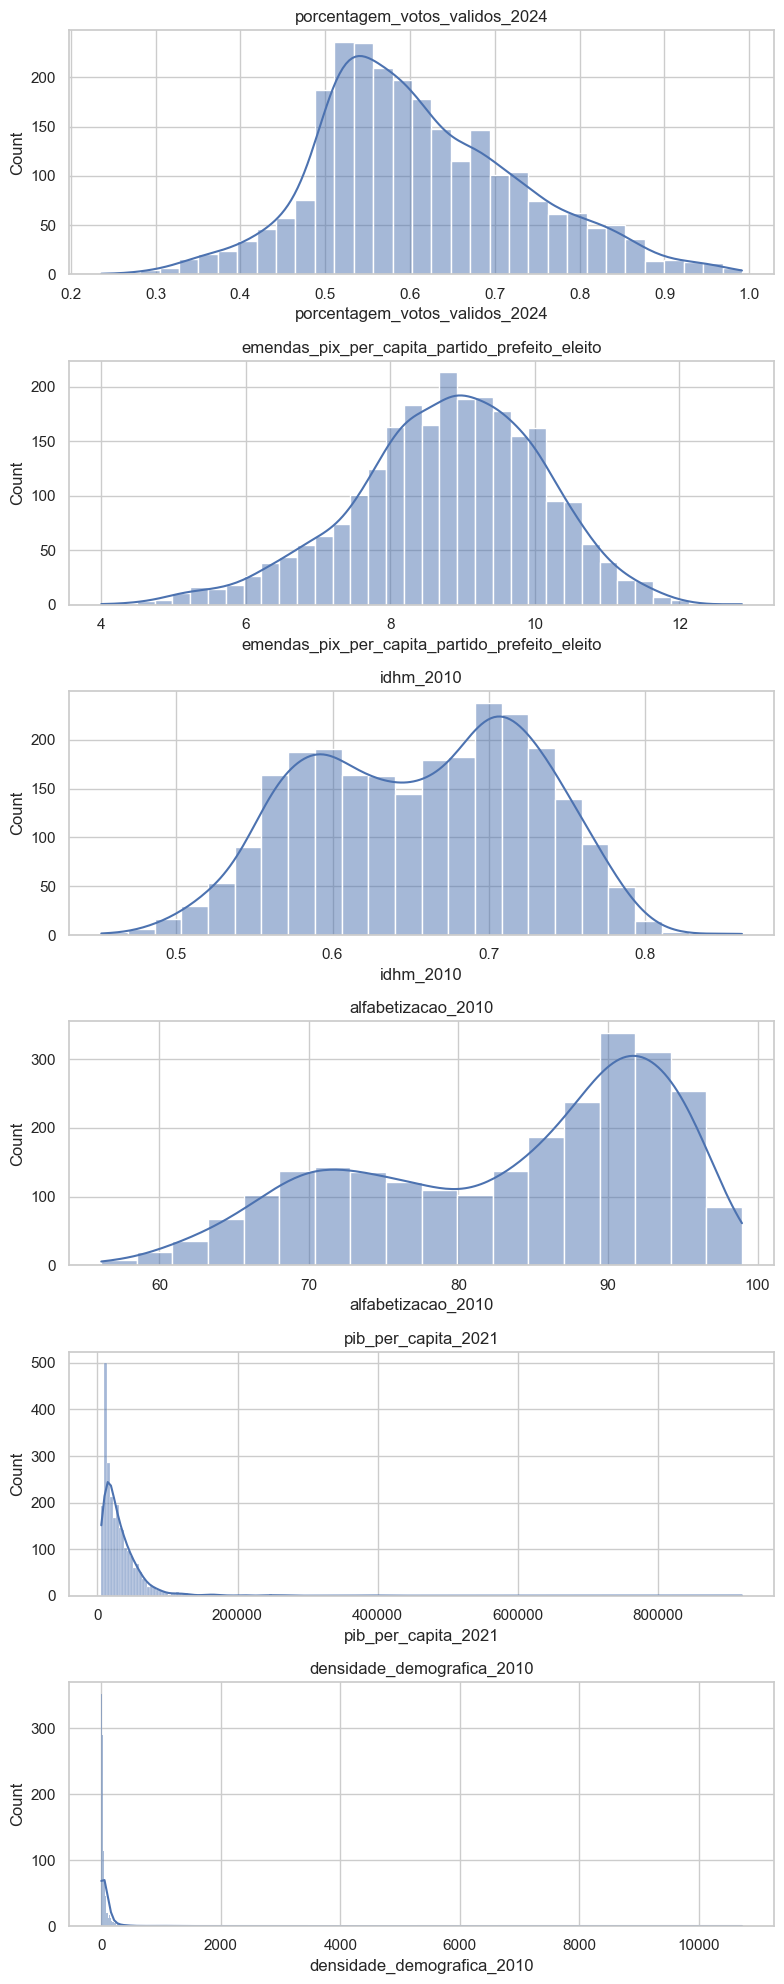

In [22]:
num_cols = ['porcentagem_votos_validos_2024', 'emendas_pix_per_capita_partido_prefeito_eleito',
            'idhm_2010', 'alfabetizacao_2010', 'pib_per_capita_2021', 'densidade_demografica_2010']
# Gera um histograma para cada variável
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 20))
for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    if col in ['emendas_pix_per_capita_partido_prefeito_eleito', 'pib_per_capita_2021']:
        ax.set_xscale('log')
    ax.set_title(col)
plt.tight_layout()

## Partidos

Analisamos a distribuição das siglas partidárias e o desempenho médio por partido.

In [10]:
party_counts = df['sigla_partido_prefeito_eleito'].value_counts().head(30)
party_counts

sigla_partido_prefeito_eleito
PSD              838
MDB              812
PP               713
UNIÃO            545
PL               467
REPUBLICANOS     409
PSB              302
PSDB             259
PT               240
PDT              139
AVANTE           130
PODE             112
PRD               73
SOLIDARIEDADE     61
CIDADANIA         31
PC do B           19
MOBILIZA          18
NOVO              16
PV                13
REDE               4
AGIR               3
PMB                2
DC                 2
Name: count, dtype: int64

In [11]:
party_perf = df.groupby('sigla_partido_prefeito_eleito')['porcentagem_votos_validos_2024'].mean().sort_values(ascending=False)
party_perf.head(30)

sigla_partido_prefeito_eleito
AGIR             0.839318
REDE             0.692771
CIDADANIA        0.664628
PSB              0.632542
PSD              0.628189
MOBILIZA         0.627204
MDB              0.625186
PC do B          0.622128
UNIÃO            0.621065
PRD              0.616163
REPUBLICANOS     0.615716
AVANTE           0.615396
PP               0.612313
PDT              0.601958
PSDB             0.601110
PT               0.599440
PODE             0.594902
PL               0.591822
SOLIDARIEDADE    0.576886
PV               0.554501
NOVO             0.539479
PMB              0.527939
DC               0.497445
Name: porcentagem_votos_validos_2024, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
party_counts.plot(kind='bar', ax=ax)
ax.set_ylabel('Número de Municípios')
ax.set_title('Top 10 partidos por quantidade de prefeitos eleitos')
plt.show()


## Relação entre Emendas PIX per capita e Desempenho Eleitoral

Verificamos se há correlação entre o valor das emendas recebidas e a proporção de votos válidos.

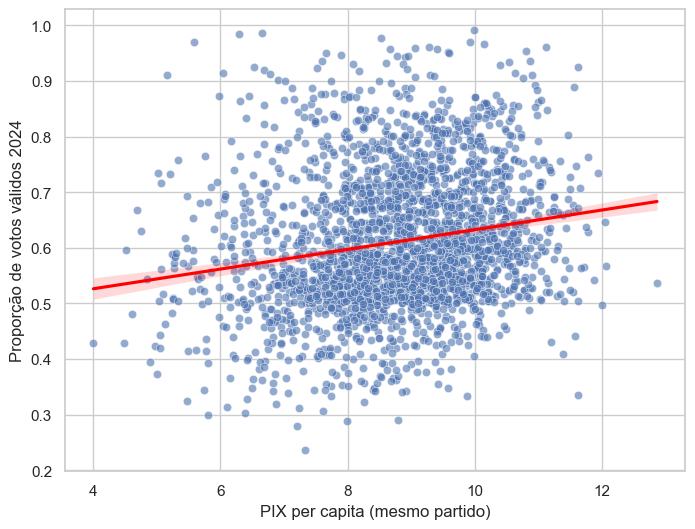

In [21]:
# Contagem de casos removidos
total = len(df)
count_100 = (df['porcentagem_votos_validos_2024'] >= 1).sum()
count_zero = (df['emendas_pix_per_capita_partido_prefeito_eleito'] == 0).sum()
print(f'Total de municípios: {total}')
print(f'Casos com 100% dos votos válidos: {count_100}')
print(f'Casos com soma de emendas PIX igual a 0: {count_zero}')

# Filtrar dados para a análise
df = df[(df['emendas_pix_per_capita_partido_prefeito_eleito'] > 0) &
        (df['porcentagem_votos_validos_2024'] < 1)]

# Utilizar escala adequada para o gráfico
df['emendas_pix_per_capita_partido_prefeito_eleito'] = np.log1p(df['emendas_pix_per_capita_partido_prefeito_eleito'])

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='emendas_pix_per_capita_partido_prefeito_eleito', y='porcentagem_votos_validos_2024', alpha=0.6, ax=ax)
sns.regplot(data=df, x='emendas_pix_per_capita_partido_prefeito_eleito', y='porcentagem_votos_validos_2024', scatter=False, color='red', ax=ax)
ax.set_xlabel('PIX per capita (mesmo partido)')
ax.set_ylabel('Proporção de votos válidos 2024')
plt.show()

## Correlações

Matriz de correlação entre as variáveis numéricas.

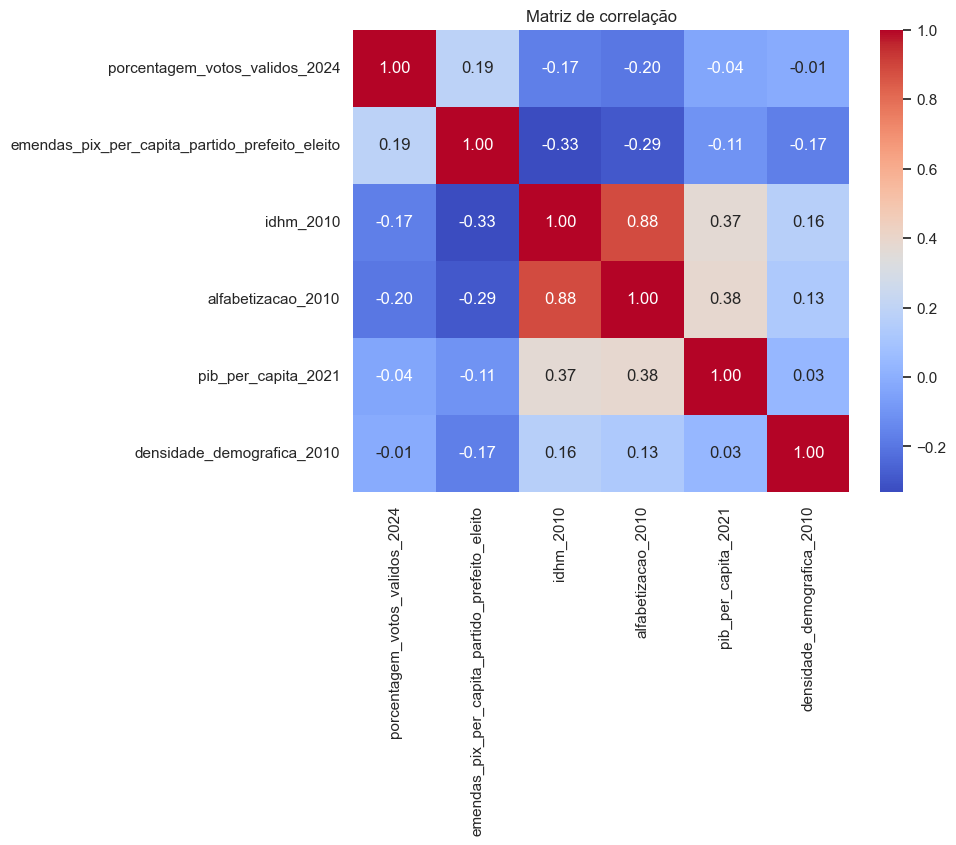

In [23]:
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()


## Relação entre IDHM e Proporção de Votos Válidos

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='idhm_2010', y='porcentagem_votos_validos_2024', alpha=0.6, ax=ax)
sns.regplot(data=df, x='idhm_2010', y='porcentagem_votos_validos_2024', scatter=False, color='red', ax=ax)
ax.set_xlabel('IDHM 2010')
ax.set_ylabel('Proporção de votos válidos 2024')
plt.show()